<a href="https://colab.research.google.com/github/Zedbog/First_repository/blob/master/zadania_wizualizacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadania z sesji samodzielnej z wizualizacji

In [2]:
#zapewnia, że wykresy wyskakują jako output, a nie w osobnym oknie
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [1]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 69 (delta 15), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (69/69), done.


#Zadanie 1 + Zadanie 2

In [3]:
ves_usd = pd.read_csv('ML-datasets/ves-usd.csv', decimal='.',thousands=',', parse_dates=True, index_col="Date")
ves_usd.sample(10)

,Rate,ISO Code From,ISO Code To
Date,,,
2019-05-23,5626.00,USD,VES
2019-06-07,5906.00,USD,VES
2019-07-12,7128.00,USD,VES
2019-04-10,3305.50,USD,VES
2019-03-01,3295.30,USD,VES
2019-07-09,6962.00,USD,VES
2019-05-01,5191.94,USD,VES
2019-03-17,3291.50,USD,VES
2019-04-11,3306.00,USD,VES


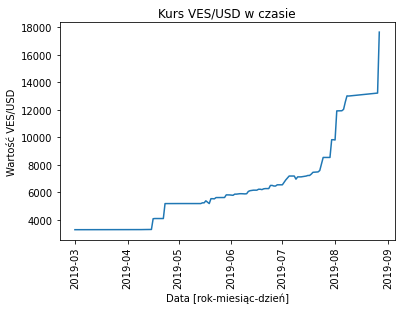

In [4]:
fig, ax = plt.subplots()
ax.plot(ves_usd.index, ves_usd.Rate)
ax.set_xlabel('Data [rok-miesiąc-dzień]')
ax.set_ylabel('Wartość VES/USD')
ax.set_title('Kurs VES/USD w czasie')
ax.xaxis.set_tick_params(rotation=90)
plt.show()

#Zadanie 3

In [4]:
olympic = pd.read_csv('ML-datasets/olympic.csv', index_col='ID')
olympic.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [8]:
def groupby_column(dataframe, column):
  groupby = dataframe.groupby(column)
  return {x: groupby.get_group(x) for x in groupby.groups}

In [9]:
def analyze_medals(medals_df):
  ret = {}
  countries = groupby_column(medals_df, 'NOC')
  for country, df in countries.items():
    counts = df.Medal.value_counts()
    gold = counts.Gold if 'Gold' in counts else 0
    silver = counts.Silver if 'Silver' in counts else 0
    bronze = counts.Bronze if 'Bronze' in counts else 0
    ret[country] = (gold, silver, bronze)
  return ret

In [10]:
medals_df = pd.DataFrame.from_dict(analyze_medals(olympic), orient='index', columns=['Gold', 'Silver', 'Bronze'])
display(medals_df.sort_values('Gold', ascending=False))


,Gold,Silver,Bronze
USA,2638,1641,1358
URS,1082,732,689
GER,745,674,746
GBR,678,739,651
ITA,575,531,531
...,...,...,...
LAO,0,0,0
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [11]:
sum_of_medals = medals_df[medals_df.sum(axis=1) > 1000]
sum_of_medals['Sum'] = medals_df.sum(axis=1)
sum_of_medals = sum_of_medals.sort_values('Sum', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


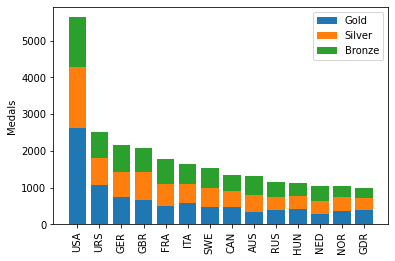

In [12]:
fig, ax = plt.subplots()
ax.bar(sum_of_medals.index, sum_of_medals.Gold, label='Gold')
ax.bar(sum_of_medals.index, sum_of_medals.Silver, label='Silver', bottom=sum_of_medals.Gold)
ax.bar(sum_of_medals.index, sum_of_medals.Bronze, label='Bronze', bottom=sum_of_medals.Gold + sum_of_medals.Silver)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Medals')
ax.legend()
plt.show()

#Zadanie 4

In [25]:
def medals_per_person(medals_pp):
  ret = {}
  people = groupby_column(medals_pp,'Name')
  for person, df in people.items():
    counts = df.Medal.value_counts()
    gold = counts.Gold if 'Gold' in counts else 0
    silver = counts.Silver if 'Silver' in counts else 0
    bronze = counts.Bronze if 'Bronze' in counts else 0
    ret[person] = (gold, silver, bronze)
  return ret

In [26]:
medals_pp = pd.DataFrame.from_dict(medals_per_person(olympic), orient='index', columns=['Gold', 'Silver', 'Bronze'])
sum_of_medals_per_person = medals_pp[medals_pp.sum(axis=1) > 1]
sum_of_medals_per_person['Sum'] = medals_pp.sum(axis=1)
display(sum_of_medals_per_person.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gold,Silver,Bronze,Sum
A. Dubois,0,1,1,2
"Aagje ""Ada"" Kok (-van der Linden)",1,2,0,3
Aaron Wells Peirsol,5,2,0,7
Abbey Weitzeil,1,1,0,2
Abdon Pamich,1,0,1,2


In [27]:
merged = pd.merge(sum_of_medals_per_person, olympic, how='inner', left_index=True, right_on='Name')
merged = merged.sort_values('Sum')

In [19]:
merged.head(50)

,Gold,Silver,Bronze,Sum,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,,,,,
30274,0,1,1,2,A. Dubois,M,NaN,NaN,NaN,Gitana-21,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN
78867,1,1,0,2,Lewis Leon Meredith,M,38.0,NaN,NaN,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Cycling,"Cycling Men's Road Race, Individual",NaN
78867,1,1,0,2,Lewis Leon Meredith,M,30.0,NaN,NaN,England-1,GBR,1912 Summer,1912,Summer,Stockholm,Cycling,"Cycling Men's Road Race, Team",Silver
78867,1,1,0,2,Lewis Leon Meredith,M,30.0,NaN,NaN,England,GBR,1912 Summer,1912,Summer,Stockholm,Cycling,"Cycling Men's Road Race, Individual",NaN
78867,1,1,0,2,Lewis Leon Meredith,M,26.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Cycling,Cycling Men's 100 kilometres,NaN
78867,1,1,0,2,Lewis Leon Meredith,M,26.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Cycling,Cycling Men's 20 kilometres,NaN
78867,1,1,0,2,Lewis Leon Meredith,M,26.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Cycling,"Cycling Men's Team Pursuit, 1,980 yards",Gold
78867,1,1,0,2,Lewis Leon Meredith,M,26.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",NaN
119008,2,0,0,2,Levan Tediashvili,M,28.0,186.0,90.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",Gold


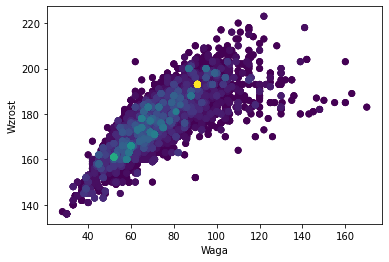

In [20]:
fig, ax = plt.subplots()
ax.scatter(merged.Weight, merged.Height, c=merged.Sum)
ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
plt.show()

#Zadanie 5

In [21]:
co2 = pd.read_csv('ML-datasets/co2.csv',parse_dates=True, index_col='Date', na_values=-99.99)
co2.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


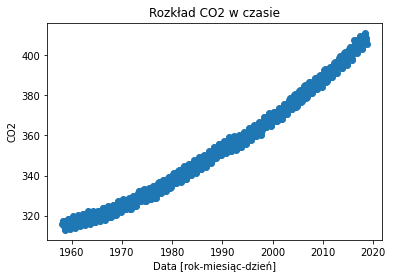

In [22]:
fig, ax = plt.subplots()
ax.scatter(co2.index, co2.Interpolated)
ax.set_xlabel('Data [rok-miesiąc-dzień]')
ax.set_ylabel('CO2')
ax.set_title('Rozkład CO2 w czasie')
plt.show()

# Zadanie 6

In [3]:
olympic.head()

NameError: ignored

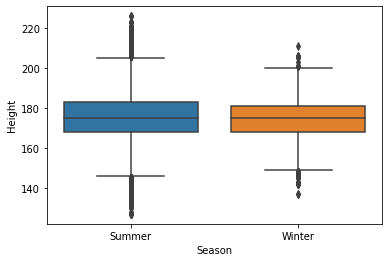

In [5]:
sns.boxplot(x=olympic.Season, y=olympic.Height)
sns.set(style='white')

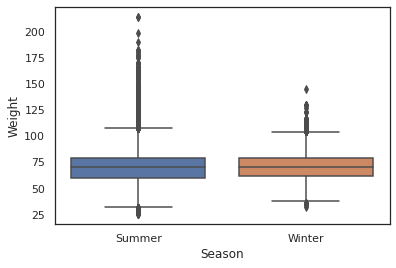

In [6]:
sns.boxplot(x=olympic.Season, y=olympic.Weight)

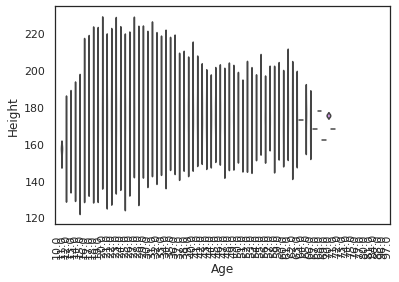

In [7]:
age_height = sns.violinplot(x=olympic.Age, y=olympic.Height, inner=None)
age_height.xaxis.set_tick_params(rotation=90)


In [ ]:
age_height = sns.swarmplot(x=olympic.Age, y=olympic.Height)
age_height.xaxis.set_tick_params(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; y

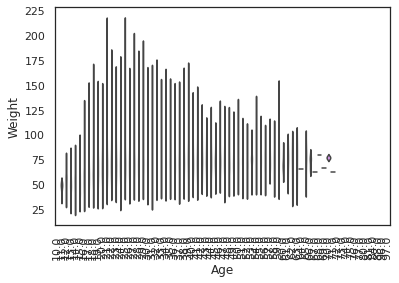

In [38]:
age_weight = sns.violinplot(x=olympic.Age, y=olympic.Weight, inner=None)
age_weight.xaxis.set_tick_params(rotation=90)

In [39]:
merged = merged.sort_values('Gold', ascending= False)
merged.head(15)

,Gold,Silver,Bronze,Sum,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,,,,,
94406,23,3,2,28,"Michael Fred Phelps, II",M,27.0,193.0,91.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 400 metres Individual Medley,NaN
94406,23,3,2,28,"Michael Fred Phelps, II",M,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Butterfly,Gold
94406,23,3,2,28,"Michael Fred Phelps, II",M,31.0,193.0,91.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Silver
94406,23,3,2,28,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
94406,23,3,2,28,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
94406,23,3,2,28,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
94406,23,3,2,28,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
94406,23,3,2,28,"Michael Fred Phelps, II",M,31.0,193.0,91.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
94406,23,3,2,28,"Michael Fred Phelps, II",M,31.0,193.0,91.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Individual Medley,Gold


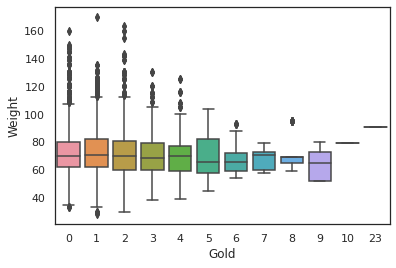

In [41]:
sns.boxplot(x=merged.Gold, y=merged.Weight)

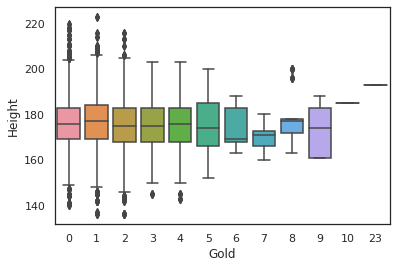

In [42]:
sns.boxplot(x=merged.Gold, y=merged.Height)

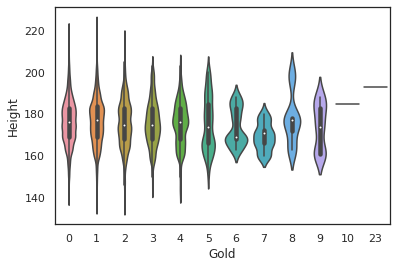

In [43]:
sns.violinplot(x=merged.Gold, y=merged.Height)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; y

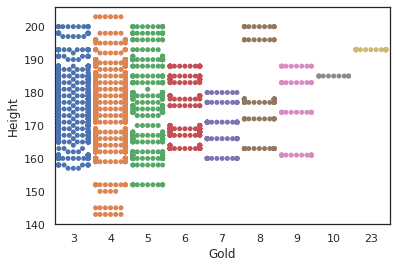

In [47]:
sns.swarmplot(x=merged.Gold.iloc[:3000], y=merged.Height[:3000])

In [50]:
merged_gold = merged[merged.Gold >= 1]

In [ ]:
merged.info()

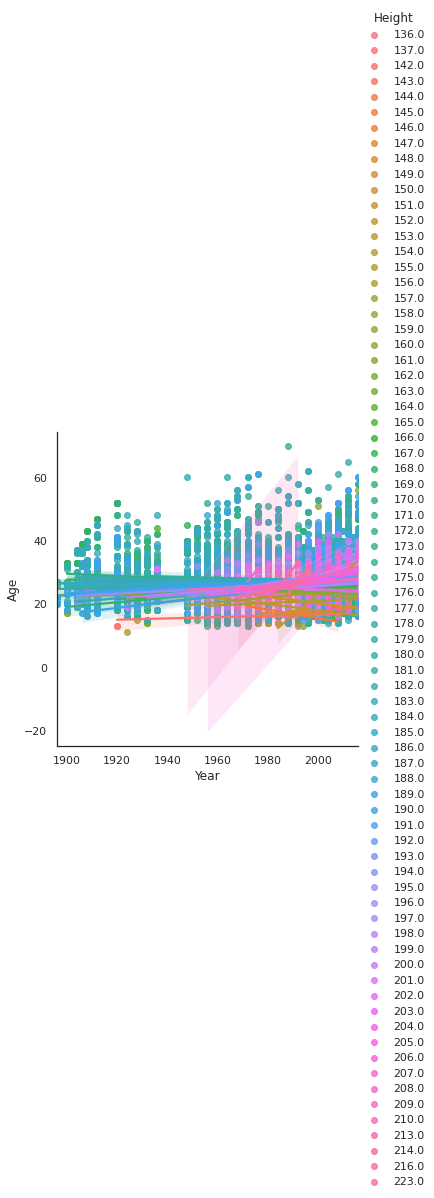

In [62]:
sns.lmplot(x='Year', y='Age', data=merged_gold, fit_reg=True, hue='Height')

In [67]:
merged_age = merged[merged.Age > 60]

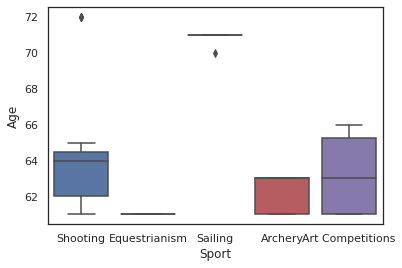

In [68]:
sns.boxplot(x=merged_age.Sport, y=merged_age.Age)

In [72]:
merged_age[merged_age.Sport == 'Shooting']

,Gold,Silver,Bronze,Sum,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,,,,,
117046,3,1,2,6,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot",NaN
117046,3,1,2,6,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Double Shot",Bronze
117046,3,1,2,6,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold
117046,3,1,2,6,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver
117046,3,1,2,6,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN
117046,3,1,2,6,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,Shooting Men's Trap,NaN
117046,3,1,2,6,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot, Team",NaN
124156,1,1,1,3,Paul Van Asbroeck,M,62.0,NaN,NaN,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN
124156,1,1,1,3,Paul Van Asbroeck,M,62.0,NaN,NaN,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN
